<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_shadow.png" width="300px" align="left"></a>

## Basic Imports

In [1]:
# import cufflinks
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
np.set_printoptions(suppress=True)
# cufflinks.set_config_file(offline=True)
%config InlineBackend.figure_format = 'svg'

## Reading Financial Data

In [2]:
url = 'https://certificate.tpq.io/findata.csv'

In [3]:
raw = pd.read_csv(url,index_col = 0,parse_dates=True).dropna()

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2518 non-null   float64
 1   MSFT.O  2518 non-null   float64
 2   INTC.O  2518 non-null   float64
 3   AMZN.O  2518 non-null   float64
 4   GS.N    2518 non-null   float64
 5   .SPX    2518 non-null   float64
 6   .VIX    2518 non-null   float64
 7   SPY     2518 non-null   float64
 8   EUR=    2518 non-null   float64
 9   XAU=    2518 non-null   float64
 10  GDX     2518 non-null   float64
 11  GLD     2518 non-null   float64
dtypes: float64(12)
memory usage: 255.7 KB


In [5]:
rn = np.random.standard_normal(len(raw))

In [7]:
raw['random'] = 100+rn.cumsum()

In [10]:
symbol = 'AAPL.O'
symbol = 'GLD'
symbol = 'random'

In [16]:
df = pd.DataFrame(raw[symbol])

<Axes: xlabel='Date'>

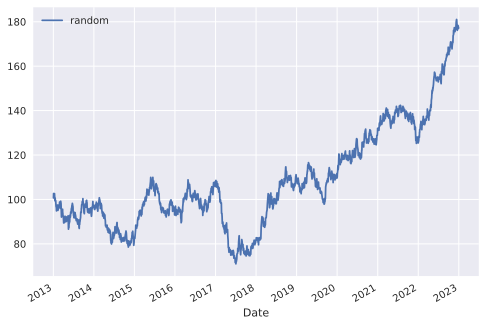

In [17]:
df.plot()

## Efficient Markets

In [18]:
lags = 5

In [20]:
cols = list()
for lag in range(1,1+lags):
    col = f'lags_{lag}'
    print(col)
    df[col] = df[symbol].shift(lag)
    cols.append(col)
    

lags_1
lags_2
lags_3
lags_4
lags_5


In [22]:
df.head(8)

,random,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5
Date,,,,,,,
2013-01-02,100.679075,100.679075,NaN,NaN,NaN,NaN,NaN
2013-01-03,102.663312,102.663312,100.679075,NaN,NaN,NaN,NaN
2013-01-04,102.260690,102.260690,102.663312,100.679075,NaN,NaN,NaN
2013-01-07,102.129924,102.129924,102.260690,102.663312,100.679075,NaN,NaN
2013-01-08,101.983065,101.983065,102.129924,102.260690,102.663312,100.679075,NaN
2013-01-09,101.648818,101.648818,101.983065,102.129924,102.260690,102.663312,100.679075
2013-01-10,102.567475,102.567475,101.648818,101.983065,102.129924,102.260690,102.663312
2013-01-11,102.627020,102.627020,102.567475,101.648818,101.983065,102.129924,102.260690


In [27]:
# Drop all the NaNs
#df.dropna(inplace=True)
df.head(10)


,random,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5
Date,,,,,,,
2013-01-09,101.648818,101.648818,101.983065,102.129924,102.260690,102.663312,100.679075
2013-01-10,102.567475,102.567475,101.648818,101.983065,102.129924,102.260690,102.663312
2013-01-11,102.627020,102.627020,102.567475,101.648818,101.983065,102.129924,102.260690
2013-01-14,100.482061,100.482061,102.627020,102.567475,101.648818,101.983065,102.129924
2013-01-15,99.422210,99.422210,100.482061,102.627020,102.567475,101.648818,101.983065
2013-01-16,99.668545,99.668545,99.422210,100.482061,102.627020,102.567475,101.648818
2013-01-17,100.652611,100.652611,99.668545,99.422210,100.482061,102.627020,102.567475
2013-01-18,99.645445,99.645445,100.652611,99.668545,99.422210,100.482061,102.627020
2013-01-22,99.464997,99.464997,99.645445,100.652611,99.668545,99.422210,100.482061


In [28]:
reg = np.linalg.lstsq(df[cols],df[symbol],rcond=False)[0] # Extract the 1st element. Returns the least-squares solution to a linear matrix equation
reg

array([ 1.00958505,  0.010563  ,  0.00313648, -0.04263896,  0.01964553])

<BarContainer object of 5 artists>

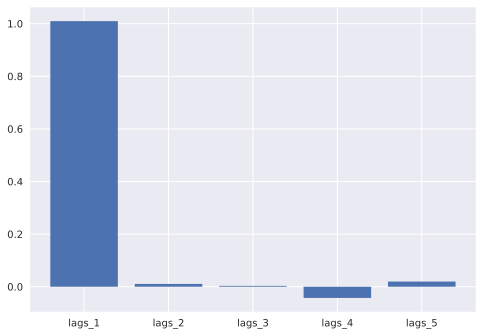

In [30]:
plt.bar(cols,reg)

In [31]:
df[cols].corr() # Price data are perfectly correlated

,lags_1,lags_2,lags_3,lags_4,lags_5
lags_1,1.000000,0.999086,0.998154,0.997184,0.996170
lags_2,0.999086,1.000000,0.999083,0.998147,0.997174
lags_3,0.998154,0.999083,1.000000,0.999080,0.998140
lags_4,0.997184,0.998147,0.999080,1.000000,0.999075
lags_5,0.996170,0.997174,0.998140,0.999075,1.000000



An Ordinary Least Squares (OLS) regression-based trading strategy involves using linear regression to model the relationship between one or more independent variables(lags) and a dependent variable (typically a financial instrument's price or return)

We want to use historical log returns to predict the direction of next days market movement (i.e. the sign of next days return, and not the absolute size).

In [40]:
symbol = "GLD"

In [41]:
data = pd.DataFrame(raw[symbol]).dropna()

<Axes: xlabel='Date'>

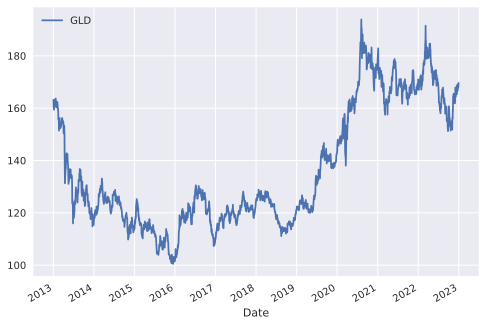

In [42]:
data.plot()

In [43]:
data['returns'] = np.log(data[symbol]/data[symbol].shift(1))

In [44]:
data['direction'] = np.sign(data['returns'])

In [45]:
data.head(10)

,GLD,returns,direction
Date,,,
2013-01-02,163.170,NaN,NaN
2013-01-03,161.200,-0.012147,-1.0
2013-01-04,160.440,-0.004726,-1.0
2013-01-07,159.430,-0.006315,-1.0
2013-01-08,160.560,0.007063,1.0
2013-01-09,160.490,-0.000436,-1.0
2013-01-10,161.980,0.009241,1.0
2013-01-11,161.060,-0.005696,-1.0
2013-01-14,161.540,0.002976,1.0


In [61]:
lags = 10

In [62]:
cols = list()
for lag in range(1,lags+1):
    col = f'lags_{lag}'
    data[col] = data['returns'].shift(lag)
    cols.append(col)

In [63]:
data.head(10)

,GLD,returns,direction,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,predicted_returns,predicted_direction,lags_8,lags_9,lags_10
Date,,,,,,,,,,,,,,,
2013-01-14,161.540,0.002976,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000140,-1.0,NaN,NaN,NaN
2013-01-15,162.558,0.006282,1.0,0.002976,NaN,NaN,NaN,NaN,NaN,NaN,0.000310,1.0,NaN,NaN,NaN
2013-01-16,162.650,0.000566,1.0,0.006282,0.002976,NaN,NaN,NaN,NaN,NaN,-0.000312,-1.0,NaN,NaN,NaN
2013-01-17,163.350,0.004294,1.0,0.000566,0.006282,0.002976,NaN,NaN,NaN,NaN,-0.000196,-1.0,NaN,NaN,NaN
2013-01-18,163.090,-0.001593,-1.0,0.004294,0.000566,0.006282,0.002976,NaN,NaN,NaN,0.000296,1.0,NaN,NaN,NaN
2013-01-22,163.670,0.003550,1.0,-0.001593,0.004294,0.000566,0.006282,0.002976,NaN,NaN,-0.000291,-1.0,NaN,NaN,NaN
2013-01-23,163.210,-0.002814,-1.0,0.003550,-0.001593,0.004294,0.000566,0.006282,0.002976,NaN,0.000070,1.0,NaN,NaN,NaN
2013-01-24,161.420,-0.011028,-1.0,-0.002814,0.003550,-0.001593,0.004294,0.000566,0.006282,0.002976,-0.000237,-1.0,NaN,NaN,NaN
2013-01-25,160.650,-0.004782,-1.0,-0.011028,-0.002814,0.003550,-0.001593,0.004294,0.000566,0.006282,0.000011,1.0,0.002976,NaN,NaN


In [64]:
data.dropna(inplace=True)

In [65]:
data.head(10)

,GLD,returns,direction,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,predicted_returns,predicted_direction,lags_8,lags_9,lags_10
Date,,,,,,,,,,,,,,,
2013-01-29,160.99,0.004358,1.0,-0.002243,-0.004782,-0.011028,-0.002814,0.003550,-0.001593,0.004294,-0.000324,-1.0,0.000566,0.006282,0.002976
2013-01-30,162.19,0.007426,1.0,0.004358,-0.002243,-0.004782,-0.011028,-0.002814,0.003550,-0.001593,0.000153,1.0,0.004294,0.000566,0.006282
2013-01-31,161.20,-0.006123,-1.0,0.007426,0.004358,-0.002243,-0.004782,-0.011028,-0.002814,0.003550,0.000175,1.0,-0.001593,0.004294,0.000566
2013-02-01,161.45,0.001550,1.0,-0.006123,0.007426,0.004358,-0.002243,-0.004782,-0.011028,-0.002814,0.000109,1.0,0.003550,-0.001593,0.004294
2013-02-04,162.00,0.003401,1.0,0.001550,-0.006123,0.007426,0.004358,-0.002243,-0.004782,-0.011028,0.000424,1.0,-0.002814,0.003550,-0.001593
2013-02-05,161.96,-0.000247,-1.0,0.003401,0.001550,-0.006123,0.007426,0.004358,-0.002243,-0.004782,-0.000396,-1.0,-0.011028,-0.002814,0.003550
2013-02-06,162.39,0.002651,1.0,-0.000247,0.003401,0.001550,-0.006123,0.007426,0.004358,-0.002243,-0.000089,-1.0,-0.004782,-0.011028,-0.002814
2013-02-07,161.84,-0.003393,-1.0,0.002651,-0.000247,0.003401,0.001550,-0.006123,0.007426,0.004358,0.000218,1.0,-0.002243,-0.004782,-0.011028
2013-02-08,161.57,-0.001670,-1.0,-0.003393,0.002651,-0.000247,0.003401,0.001550,-0.006123,0.007426,-0.000206,-1.0,0.004358,-0.002243,-0.004782


In [66]:
data[cols].corr() # prices are not correlated

,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10
lags_1,1.000000,0.003823,-0.021578,0.032154,-0.014441,-0.023873,0.001881,-0.005354,-0.001997,-0.017226
lags_2,0.003823,1.000000,0.004166,-0.021726,0.032007,-0.014115,-0.023922,0.001469,-0.005417,-0.002272
lags_3,-0.021578,0.004166,1.000000,0.004469,-0.021833,0.031846,-0.014352,-0.023630,0.001108,-0.005388
lags_4,0.032154,-0.021726,0.004469,1.000000,0.004316,-0.021376,0.031858,-0.014975,-0.023605,0.000752
lags_5,-0.014441,0.032007,-0.021833,0.004316,1.000000,0.004451,-0.021286,0.031669,-0.014839,-0.023676
lags_6,-0.023873,-0.014115,0.031846,-0.021376,0.004451,1.000000,0.004333,-0.020430,0.031482,-0.014404
lags_7,0.001881,-0.023922,-0.014352,0.031858,-0.021286,0.004333,1.000000,0.004467,-0.020331,0.031605
lags_8,-0.005354,0.001469,-0.023630,-0.014975,0.031669,-0.020430,0.004467,1.000000,0.004689,-0.020965
lags_9,-0.001997,-0.005417,0.001108,-0.023605,-0.014839,0.031482,-0.020331,0.004689,1.000000,0.004879
lags_10,-0.017226,-0.002272,-0.005388,0.000752,-0.023676,-0.014404,0.031605,-0.020965,0.004879,1.000000


In [67]:
reg = np.linalg.lstsq(data[cols],data['returns'],rcond=False)[0]
reg

array([ 0.00423321, -0.02176868,  0.031758  , -0.01525223, -0.02369565,
        0.0005441 , -0.00443546, -0.00122754, -0.01782697, -0.03235467])

<BarContainer object of 10 artists>

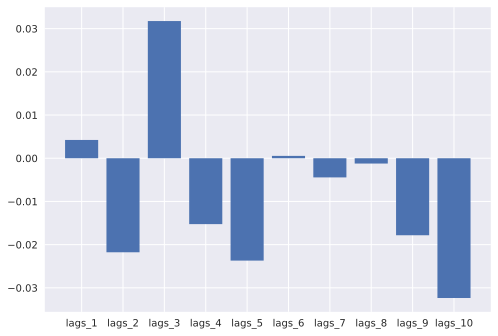

In [68]:
plt.bar(cols,reg)

In [69]:
data['predicted_returns'] = np.dot(data[cols],reg)

<Axes: xlabel='Date'>

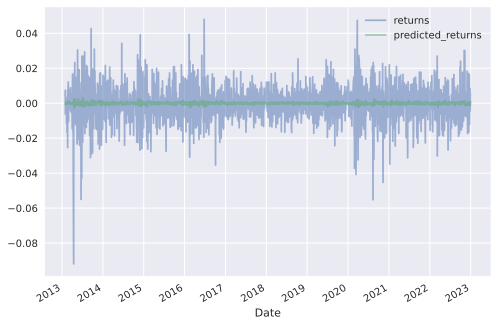

In [70]:
data[['returns','predicted_returns']].plot(alpha = 0.5)

In [71]:
data['predicted_direction'] = np.sign(data['predicted_returns'])

In [72]:
data.head(10)

,GLD,returns,direction,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,predicted_returns,predicted_direction,lags_8,lags_9,lags_10
Date,,,,,,,,,,,,,,,
2013-01-29,160.99,0.004358,1.0,-0.002243,-0.004782,-0.011028,-0.002814,0.003550,-0.001593,0.004294,-0.000526,-1.0,0.000566,0.006282,0.002976
2013-01-30,162.19,0.007426,1.0,0.004358,-0.002243,-0.004782,-0.011028,-0.002814,0.003550,-0.001593,-0.000059,-1.0,0.004294,0.000566,0.006282
2013-01-31,161.20,-0.006123,-1.0,0.007426,0.004358,-0.002243,-0.004782,-0.011028,-0.002814,0.003550,0.000089,1.0,-0.001593,0.004294,0.000566
2013-02-01,161.45,0.001550,1.0,-0.006123,0.007426,0.004358,-0.002243,-0.004782,-0.011028,-0.002814,-0.000010,-1.0,0.003550,-0.001593,0.004294
2013-02-04,162.00,0.003401,1.0,0.001550,-0.006123,0.007426,0.004358,-0.002243,-0.004782,-0.011028,0.000400,1.0,-0.002814,0.003550,-0.001593
2013-02-05,161.96,-0.000247,-1.0,0.003401,0.001550,-0.006123,0.007426,0.004358,-0.002243,-0.004782,-0.000461,-1.0,-0.011028,-0.002814,0.003550
2013-02-06,162.39,0.002651,1.0,-0.000247,0.003401,0.001550,-0.006123,0.007426,0.004358,-0.002243,0.000197,1.0,-0.004782,-0.011028,-0.002814
2013-02-07,161.84,-0.003393,-1.0,0.002651,-0.000247,0.003401,0.001550,-0.006123,0.007426,0.004358,0.000676,1.0,-0.002243,-0.004782,-0.011028
2013-02-08,161.57,-0.001670,-1.0,-0.003393,0.002651,-0.000247,0.003401,0.001550,-0.006123,0.007426,-0.000015,-1.0,0.004358,-0.002243,-0.004782


In [73]:
sum(data['direction']==data['predicted_direction'])/len(data) # accuracy ratio

0.5028

## Vectorized Backtesting

In trading, it is important to get the **large movements** (in absolute terms) correct.

The following backtesting is done under a number of simplifying assumptions, such as zero transaction costs, zero margins for short positions.

In [74]:
# Derive strategy returns from the predicted_direction
data['strategy_returns'] = data['returns'] * data['predicted_direction']

In [75]:
# Sum of log returns
data[['returns','strategy_returns']].sum()

returns             0.056694
strategy_returns    0.796478
dtype: float64

In [77]:
# Gross Returns
data[['returns','strategy_returns']].sum().apply(np.exp) 

# using np.exp expresses the cumulative return as a percentage. In this case,
#returns grew  ($1.058332 - $1) / $1 * 100%, which is approximately 5.83%.
# Strategy_returns grew ($2.217715 - $1) / $1 * 100%, which is approximately 121.77%.

returns             1.058332
strategy_returns    2.217715
dtype: float64

In [78]:
# Net returns
data[['returns','strategy_returns']].sum().apply(np.exp) -1

returns             0.058332
strategy_returns    1.217715
dtype: float64

<Axes: xlabel='Date'>

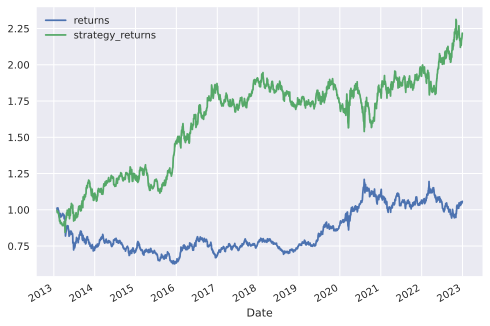

In [80]:
#Gross returns over time
data[['returns','strategy_returns']].cumsum().apply(np.exp).plot()

REMARK: simplifying assumptions are, among others, in-sample testing, no margin for short positions, no transaction costs

### Train-Test Split

In [ ]:
# !pip install quantstats

In [ ]:
# import quantstats as qs

In [ ]:
# qs.reports.metrics(test['s'], benchmark=test['r'])

In [ ]:
# qs.reports.basic(test['s'], benchmark=test['r'])

## Vectorized Backtesting (OOP Way)

### `FinancialData` Class

### Vectorized Backtesting Class

The following class implements the backtest based on an "in-sample" approach (no train-test split).

**EXERCISE**: Re-implement the class including train-test split for the backtesting.

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>